# Analysis of Data
Team: BAT-C

- Number of vulnerability terms
- 


In [1]:
# Imports
from bs4 import BeautifulSoup as bs
from google.colab import drive
from google.colab import files
from time import sleep
import os
import re
import xml.etree.ElementTree as ET
import json
import pandas as pd
import matplotlib.pylab as plt
import math
from time import sleep, strftime
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/Courses/Semester1/NLP/Project/Data/"

In [ ]:
df_vul = pd.read_csv(path + "security_keywords.csv", index_col=0)

In [ ]:
terms = df_vul["WORD"]
terms = terms.tolist()

In [4]:
df = pd.read_csv(path + "FINAL_MERGED.csv", index_col=0)

In [5]:
df

,CODE,TEXT,code_token_length,text_token_length,security_terms_count,has_code_construct
0,"find . | grep ""php$"" | xargs grep -s ""eval("" >...",I'm automating a script which searches through...,481,109,0,True
1,"<head>\n <script type=""text/javascript"">\n ...","As we know, developers are responsible for cor...",56,206,0,True
2,id = 1;drop table mysql.user \nOnly if semi co...,I've found a whole lot of SQL injection exploi...,85,209,0,True
3,/appdir/ \n\nDetails\nThe HTTP header user-age...,We got a security review done of our PHP code ...,255,56,0,True
4,"onclick='alert(""[variable]"")'\nvariable: hello...",how can untrusted values be included in a html...,173,197,0,True
...,...,...,...,...,...,...
32041,po $arg3\npo $arg4\npo $arg5\n\npo 0x0026a124\...,"I was about to delete this, but maybe there's ...",203,82,0,True
32042,var baseAddress = Process.enumerateModules()[0...,This was down to my misunderstanding. I was w...,81,137,0,True
32043,{\n unsigned int v2; // eax\n if (imageSize ...,Forgot to answer my own question after the hin...,122,45,0,True
32044,int i = 0;\n while (i == 0) {\n i++;\...,"In Visual Studio (not Visual Studio Code), go ...",51,213,0,True


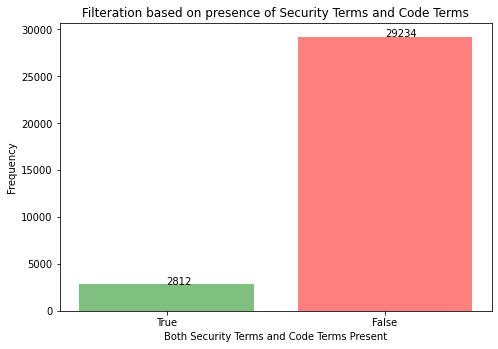

In [ ]:
# bol = (df['security_terms_count'] > 0) & (df['has_code_construct'] == True) & (df['code_token_length'] < 500) & (df['text_token_length'] < 500)
# bol = bol.value_counts().tolist()
# bol

# val = sum((df['security_terms_count'] > 0 ) == True) 
val = sum((df['security_terms_count'] > 0) & (df['has_code_construct'] == True) & (df['code_token_length'] < 500) & (df['text_token_length'] < 500) == True) 
bol = [val, len(df) - val]
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(['True', 'False'], bol, color=['green', 'red'], alpha=0.5)
ax.set_title('Filteration based on presence of Security Terms and Code Terms')
ax.set_xlabel('Both Security Terms and Code Terms Present')
ax.set_ylabel('Frequency')

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(bol):
    plt.text(xlocs[i] - 1, v, str(v))

In [ ]:
df['security_terms_count'].value_counts()

0    27552
1     3414
2      740
3      220
4       72
5       30
7        6
6        6
9        4
8        2
Name: security_terms_count, dtype: int64

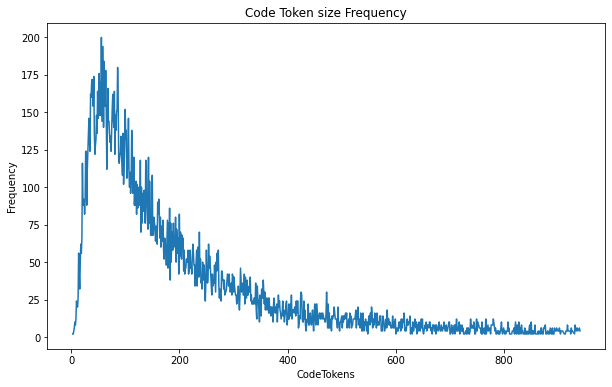

In [ ]:
# def plot_bar_graph():
#     fig = plt.figure(figsize=(10, 6))
#     plot_ = sns.barplot(x=df['code_token_length'].value_counts(bins=range(0,3530,1024)).sort_index().index, 
#                         y=df['code_token_length'].value_counts(bins=range(0,3530,1024)).sort_index(),
#                         alpha  = 0.7)

#     plot_.set(xlabel='Number of Code Tokens', ylabel='Frequency')
#     plot_.set_xticklabels(['<1024', '1024-2048', '>2048'])
#     plot_.set(title='Code Token size Frequency')

#     def show_values(axs, orient="v", space=.01):
#         def _single(ax):
#             if orient == "v":
#                 for p in ax.patches:
#                     _x = p.get_x() + p.get_width() / 2
#                     _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
#                     value = '{:.1f}'.format(p.get_height())
#                     ax.text(_x, _y, value, ha="center") 
#             elif orient == "h":
#                 for p in ax.patches:
#                     _x = p.get_x() + p.get_width() + float(space)
#                     _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
#                     value = '{:.1f}'.format(p.get_width())
#                     ax.text(_x, _y, value, ha="left")

#         if isinstance(axs, np.ndarray):
#             for idx, ax in np.ndenumerate(axs):
#                 _single(ax)
#         else:
#             _single(axs)
#     show_values(plot_)


fig, ax = plt.subplots(figsize=(10, 6))
data_plot = pd.DataFrame({"CodeTokens": df['code_token_length'].value_counts().sort_index(ascending=True)[:900].index, 
                          "Frequency":df['code_token_length'].value_counts().sort_index(ascending=True)[:900]})
# data_plot = pd.DataFrame({"CodeTokens": df['code_token_length'].value_counts().sort_values(ascending=False).index, 
#                           "Frequency":df['code_token_length'].value_counts().sort_values(ascending=False)})

plot_ = sns.lineplot(x = "CodeTokens", y = "Frequency", data=data_plot)
plot_.set(title='Code Token size Frequency')

plt.show()

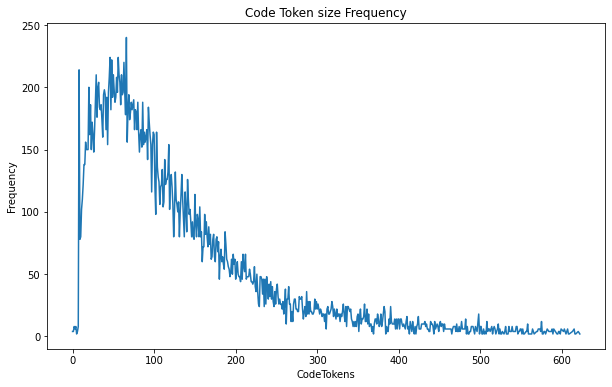

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data_plot = pd.DataFrame({"CodeTokens": df['text_token_length'].value_counts().sort_index(ascending=True)[:600].index, 
                          "Frequency":df['text_token_length'].value_counts().sort_index(ascending=True)[:600]})

plot_ = sns.lineplot(x = "CodeTokens", y = "Frequency", data=data_plot)
plot_.set(title='Code Token size Frequency')

plt.show()

In [ ]:
df['code_token_length'].value_counts().sort_index(ascending=True)

4        1
5        2
6        3
7        4
8        3
        ..
13490    1
19469    1
19475    1
22386    1
22952    1
Name: code_token_length, Length: 1156, dtype: int64

In [ ]:
len(df[df['code_token_length'] < 500])

28166

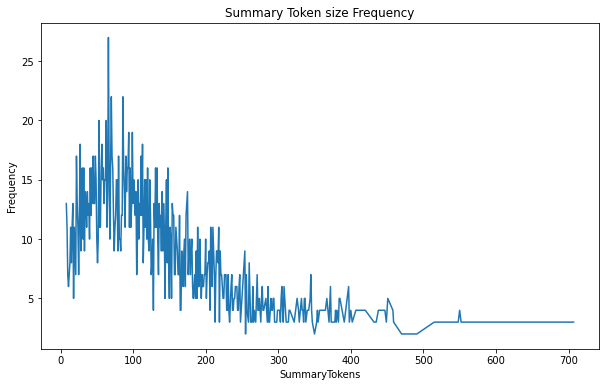

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data_plot = pd.DataFrame({"SummaryTokens": df_case1['Summary-Tokens'].value_counts().sort_values(ascending=False)[:255].index, 
                          "Frequency":df_case1['Summary-Tokens'].value_counts().sort_values(ascending=False)[:255]})
plot_ = sns.lineplot(x = "SummaryTokens", y = "Frequency", data=data_plot)
plot_.set(title='Summary Token size Frequency')

plt.show()

In [ ]:
# df_case1['Code-Tokens'].value_counts(bins=range(0,3530,1024)).sort_index().to

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data_plot = pd.DataFrame({"CodeTokens": df_case1['Code-Tokens'].value_counts().sort_values(ascending=False)[:255].index, 
                          "Frequency":df_case1['Code-Tokens'].value_counts().sort_values(ascending=False)[:255]})
sns.lineplot(x = "CodeTokens", y = "Frequency", data=data_plot)
plt.show()

In [6]:
df = df[(df['security_terms_count'] > 0) & (df['has_code_construct'] == True) & (df['code_token_length'] < 500) & (df['text_token_length'] < 500)]

In [7]:
df.to_csv(path + "filtered_FINAL.csv")